## Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data Files/train_data.csv')

In [3]:
df.head(5)

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312


## Remove outlier

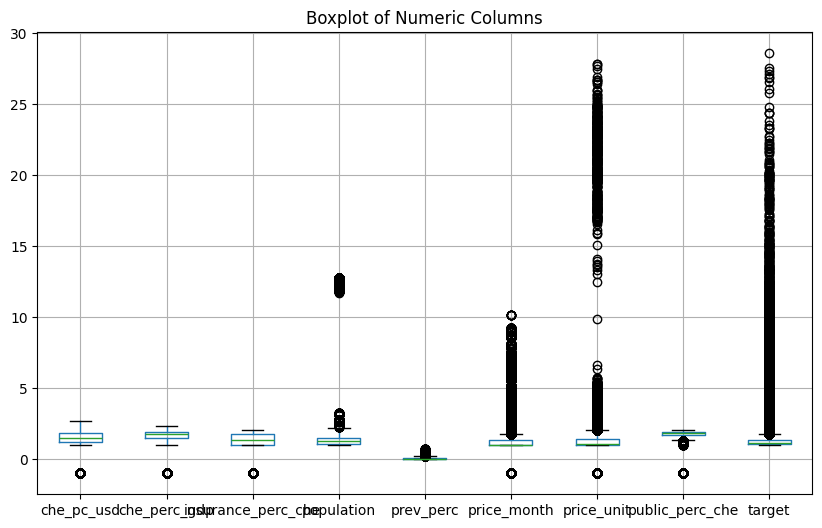

In [4]:
df_filtered = df[df['price_unit']!=df['price_unit'].max()]
df_filtered = df_filtered[df_filtered['price_unit']!=df_filtered['price_unit'].max()]
df_filtered = df_filtered[df_filtered['price_month']!=df_filtered['price_month'].max()]
numeric_df = df_filtered.select_dtypes(include='number')

# Boxplot for numeric columns
numeric_df.boxplot(figsize=(10, 6))
plt.title('Boxplot of Numeric Columns')
plt.show()

In [5]:
df_filtered.describe()

,che_pc_usd,che_perc_gdp,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,target
count,118831.000000,118831.000000,118831.000000,118831.000000,1.188310e+05,118831.000000,118831.000000,118831.000000,118831.000000
mean,1.529292,1.606878,1.009830,1.483755,5.771906e-02,0.897190,1.395177,1.761932,1.420212
std,0.439198,0.538099,1.043734,1.337021,9.165539e-02,1.179791,1.396653,0.303498,1.183644
min,-1.000000,-1.000000,-1.000000,1.000000,5.954162e-07,-1.000000,-1.000000,-1.000000,1.000000
25%,1.179931,1.464849,1.000000,1.037615,2.463952e-03,1.002854,1.011812,1.671642,1.022221
50%,1.472378,1.731474,1.346667,1.238870,1.880302e-02,1.015654,1.084950,1.835821,1.088959
75%,1.816479,1.894139,1.760000,1.506685,8.556676e-02,1.314484,1.419507,1.925373,1.309186
max,2.656913,2.311103,2.040000,12.767484,6.668035e-01,10.102683,27.839224,2.044776,28.576068


In [6]:
## Handle -1 with mean
col = ["che_pc_usd", "che_perc_gdp", "insurance_perc_che", "public_perc_che"]

for i in col:
    print(i)
    mean_val = df_filtered[col][df_filtered[col] != -1].mean()
    df_filtered[col] = df_filtered[col].replace(-1, mean_val)


df_filtered.describe()

che_pc_usd
che_perc_gdp
insurance_perc_che
public_perc_che


,che_pc_usd,che_perc_gdp,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,target
count,118831.000000,118831.000000,118831.000000,118831.000000,1.188310e+05,118831.000000,118831.000000,118831.000000,118831.000000
mean,1.545163,1.689348,1.495874,1.483755,5.771906e-02,0.897190,1.395177,1.779263,1.420212
std,0.390835,0.273057,0.335423,1.337021,9.165539e-02,1.179791,1.396653,0.210343,1.183644
min,1.000000,1.000000,1.000000,1.000000,5.954162e-07,-1.000000,-1.000000,1.000000,1.000000
25%,1.183443,1.501710,1.173333,1.037615,2.463952e-03,1.002854,1.011812,1.686567,1.022221
50%,1.518258,1.731474,1.495874,1.238870,1.880302e-02,1.015654,1.084950,1.835821,1.088959
75%,1.816479,1.894139,1.760000,1.506685,8.556676e-02,1.314484,1.419507,1.925373,1.309186
max,2.656913,2.311103,2.040000,12.767484,6.668035e-01,10.102683,27.839224,2.044776,28.576068


In [7]:
## Handle -1 with median
col = ["price_month", "price_unit"]

for i in col:
    print(i)
    mean_val = df_filtered[col][df_filtered[col] != -1].median()
    df_filtered[col] = df_filtered[col].replace(-1, mean_val)


df_filtered.describe()

price_month
price_unit


,che_pc_usd,che_perc_gdp,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,target
count,118831.000000,118831.000000,118831.000000,118831.000000,1.188310e+05,118831.000000,118831.000000,118831.000000,118831.000000
mean,1.545163,1.689348,1.495874,1.483755,5.771906e-02,1.327560,1.399373,1.779263,1.420212
std,0.390835,0.273057,0.335423,1.337021,9.165539e-02,0.697417,1.392579,0.210343,1.183644
min,1.000000,1.000000,1.000000,1.000000,5.954162e-07,1.000000,1.000000,1.000000,1.000000
25%,1.183443,1.501710,1.173333,1.037615,2.463952e-03,1.010371,1.011908,1.686567,1.022221
50%,1.518258,1.731474,1.495874,1.238870,1.880302e-02,1.120724,1.086184,1.835821,1.088959
75%,1.816479,1.894139,1.760000,1.506685,8.556676e-02,1.314484,1.419507,1.925373,1.309186
max,2.656913,2.311103,2.040000,12.767484,6.668035e-01,10.102683,27.839224,2.044776,28.576068


In [8]:
## Drop feature
df_filtered = df_filtered.drop(['ind_launch_date', 'brand', 'che_pc_usd', 'corporation', 'country', 'drug_id', 'launch_date', 'indication', 'population', 'prev_perc', 'therapeutic_area'], axis=1)

In [12]:
## Mapping value - FOR TRAIN DATA
import numpy as np
np.random.seed(100)
# Generate random values between 0 and 1 for each unique label
unique_values = df['cluster_nl'].unique()
random_mapping_train = {label: np.random.rand() for label in unique_values}
print(len(random_mapping_train))
print(random_mapping_train)

2716
{'BRAND_354E_COUNTRY_88A3': 0.5434049417909654, 'BRAND_626D_COUNTRY_8B47': 0.27836938509379616, 'BRAND_45D9_COUNTRY_88A3': 0.4245175907491331, 'BRAND_D724_COUNTRY_445D': 0.8447761323199037, 'BRAND_4887_COUNTRY_D8B0': 0.004718856190972565, 'BRAND_6E6E_COUNTRY_9488': 0.12156912078311422, 'BRAND_03C2_COUNTRY_9891': 0.6707490847267786, 'BRAND_626D_COUNTRY_5180': 0.8258527551050476, 'BRAND_F05A_COUNTRY_3AD0': 0.13670658968495297, 'BRAND_CCAA_COUNTRY_89F9': 0.57509332942725, 'BRAND_F886_COUNTRY_9891': 0.891321954312264, 'BRAND_EF30_COUNTRY_1007': 0.20920212211718958, 'BRAND_7114_COUNTRY_4242': 0.18532821955007506, 'BRAND_AAD2_COUNTRY_4242': 0.10837689046425514, 'BRAND_9202_COUNTRY_FA79': 0.21969749262499216, 'BRAND_EF52_COUNTRY_06E4': 0.9786237847073697, 'BRAND_CCAA_COUNTRY_6F78': 0.8116831490893233, 'BRAND_E31D_COUNTRY_9891': 0.1719410127325942, 'BRAND_C21A_COUNTRY_B6AE': 0.8162247487258399, 'BRAND_358A_COUNTRY_4242': 0.2740737470416992, 'BRAND_2D21_COUNTRY_E319': 0.4317041836631217, '

In [10]:
## Mapping value - FOR SUBMISSION DATA
dftest = pd.read_csv("Data Files/submission_data.csv")
np.random.seed(100)
unique_values = dftest['cluster_nl'].unique()
random_mapping_submission = {}
for label in unique_values:
    if (label in random_mapping_train):
        # print(label)
        random_mapping_submission[label] = random_mapping_train[label]
        continue
    random_mapping_submission[label] = np.random.rand()

print(len(random_mapping_submission))
print(random_mapping_submission)

182
{'BRAND_E57A_COUNTRY_06E4': 0.26398438565638704, 'BRAND_014B_COUNTRY_06E4': 0.08001627306367454, 'BRAND_1E6F_COUNTRY_4647': 0.03296633002384386, 'BRAND_9259_COUNTRY_FA79': 0.5949531622791119, 'BRAND_106A_COUNTRY_E319': 0.5610972606205763, 'BRAND_3938_COUNTRY_907E': 0.2942601943853046, 'BRAND_F649_COUNTRY_FA79': 0.7355784779381703, 'BRAND_F649_COUNTRY_2E65': 0.7376669099889789, 'BRAND_60F2_COUNTRY_C89B': 0.06446601516412498, 'BRAND_740F_COUNTRY_8B47': 0.8513082163979817, 'BRAND_740F_COUNTRY_0309': 0.24422838535899782, 'BRAND_E57A_COUNTRY_6F78': 0.9065650602113924, 'BRAND_FB69_COUNTRY_4D48': 0.06456489927913889, 'BRAND_12B2_COUNTRY_AE54': 0.4659145021876733, 'BRAND_E57A_COUNTRY_0309': 0.4275701816482139, 'BRAND_C352_COUNTRY_8B47': 0.5942778529318382, 'BRAND_740F_COUNTRY_06E4': 0.4308200782706879, 'BRAND_AA1F_COUNTRY_06E4': 0.7773791405188846, 'BRAND_014B_COUNTRY_0309': 0.1269320722590238, 'BRAND_FB57_COUNTRY_907E': 0.6472152088652817, 'BRAND_056A_COUNTRY_0309': 0.5434049417909654, 'B

In [14]:
# Map the cluster nl
df_filtered['cluster_nl_encode'] = df_filtered['cluster_nl'].map(random_mapping_train)

In [ ]:
# Reorder the columns
cols = df_filtered.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_filtered = df_filtered[cols]